
Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 1
Enter Student ID (ST-XXX): ST-001
Student ID already exists!

Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 2

Class Performance Summary:
Total Students: 50
Average Marks - Math: 78.0, English: 78.6, Science: 79.8
Pass Percentage: 82.0%

Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 3


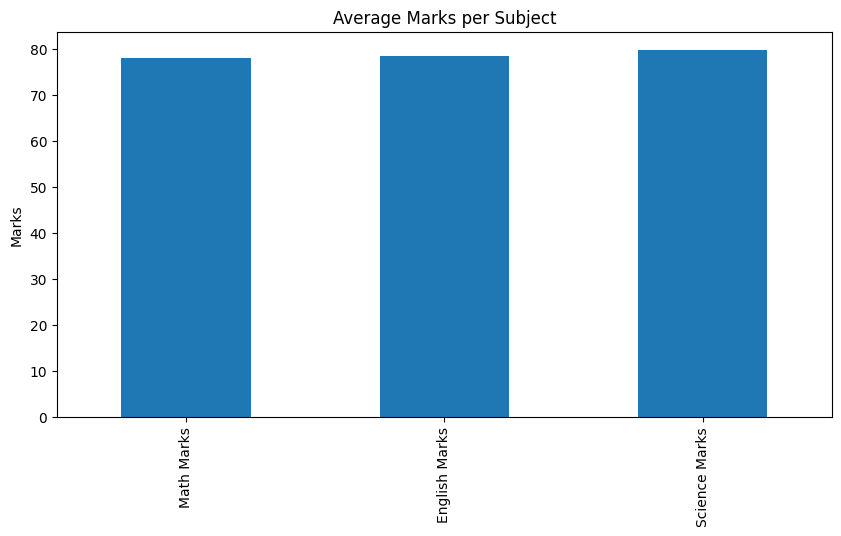

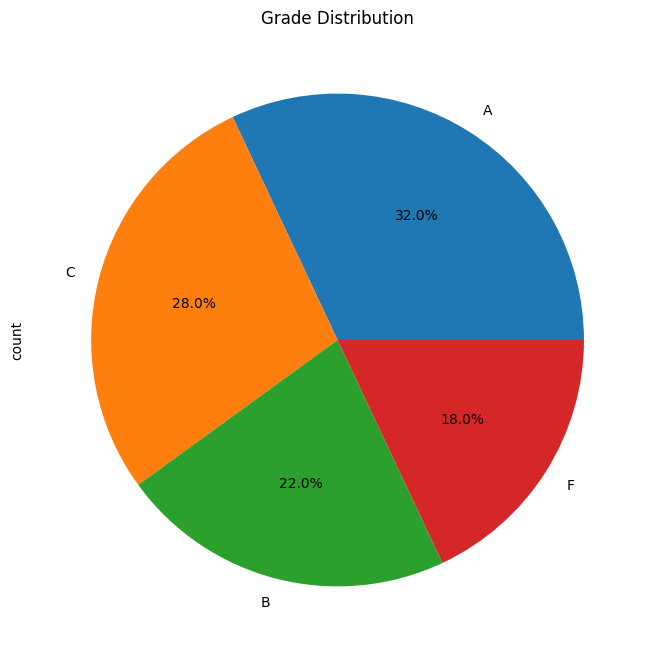


Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 4
Enter ID or name to search: ST-001
  Student ID      Name  Math Marks  English Marks  Science Marks Grade
0     ST-001  John Doe          85             78             92     B

Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 1
Enter Student ID (ST-XXX): ST-500
Enter student name: Sazzad
Math marks: 98
English marks: 95
Science marks: 99
Student added successfully!

Student Grading System
1. Add Student
2. View Class Performance
3. Visualize Data
4. Search Student
5. Exit
Enter choice: 5


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Modified to match your CSV structure
CSV_FILE = "14_Student_marks_grade.csv"
COLUMNS = ['Student ID', 'Name', 'Math Marks', 'English Marks', 'Science Marks', 'Grade']

def initialize_file():
    try:
        df = pd.read_csv(CSV_FILE)
    except FileNotFoundError:
        # Create DataFrame with your format if file doesn't exist
        df = pd.DataFrame(columns=COLUMNS)
        df.to_csv(CSV_FILE, index=False)

def calculate_grade(row):
    # Updated column names to match your CSV
    avg = np.mean([row['Math Marks'], row['English Marks'], row['Science Marks']])
    if avg >= 90: return 'A'
    elif avg >= 80: return 'B'
    elif avg >= 70: return 'C'
    else: return 'F'

def update_grades():
    df = pd.read_csv(CSV_FILE)
    df['Grade'] = df.apply(calculate_grade, axis=1)
    df.to_csv(CSV_FILE, index=False)

def add_student():
    student_id = input("Enter Student ID (ST-XXX): ")
    if not re.match(r'^ST-\d{3}$', student_id):
        print("Invalid ID format! Use ST-XXX")
        return

    df = pd.read_csv(CSV_FILE)
    if student_id in df['Student ID'].values:
        print("Student ID already exists!")
        return

    name = input("Enter student name: ")
    try:
        math = int(input("Math marks: "))
        english = int(input("English marks: "))
        science = int(input("Science marks: "))
    except ValueError:
        print("Invalid marks! Must be numeric")
        return

    # Updated to match your CSV column names
    new_student = pd.DataFrame([[student_id, name, math, english, science, '']],
                              columns=COLUMNS)
    df = pd.concat([df, new_student], ignore_index=True)
    df.to_csv(CSV_FILE, index=False)
    update_grades()
    print("Student added successfully!")

def view_performance():
    df = pd.read_csv(CSV_FILE)
    if df.empty:
        print("No records found!")
        return

    print("\nClass Performance Summary:")
    print(f"Total Students: {len(df)}")
    # Updated column references
    print(f"Average Marks - Math: {df['Math Marks'].mean():.1f}, "
          f"English: {df['English Marks'].mean():.1f}, "
          f"Science: {df['Science Marks'].mean():.1f}")
    print(f"Pass Percentage: {(df['Grade'] != 'F').sum()/len(df)*100:.1f}%")

def visualize_data():
    df = pd.read_csv(CSV_FILE)
    if df.empty:
        print("No records to visualize!")
        return

    # Updated column names in visualization
    plt.figure(figsize=(10,5))
    df[['Math Marks', 'English Marks', 'Science Marks']].mean().plot(kind='bar')
    plt.title('Average Marks per Subject')
    plt.ylabel('Marks')
    plt.show()

    plt.figure(figsize=(8,8))
    df['Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Grade Distribution')
    plt.show()

def search_student():
    search_term = input("Enter ID or name to search: ")
    df = pd.read_csv(CSV_FILE)
    result = df[(df['Student ID'] == search_term) |
               (df['Name'].str.contains(search_term, case=False))]
    print(result if not result.empty else "No matching records found")

def main_menu():
    initialize_file()
    while True:
        print("\nStudent Grading System")
        print("1. Add Student")
        print("2. View Class Performance")
        print("3. Visualize Data")
        print("4. Search Student")
        print("5. Exit")

        choice = input("Enter choice: ")
        if choice == '1': add_student()
        elif choice == '2': view_performance()
        elif choice == '3': visualize_data()
        elif choice == '4': search_student()
        elif choice == '5': break
        else: print("Invalid choice!")

if __name__ == "__main__":
    main_menu()
